# Politics Analysis
Marianne Aubin Le Quere
November 6th 2019

We want to know what different dimensions we are working with in our dataset. This will better allow us to see whether we are succeeding at our significance tests.

Credit to: https://github.com/kapadias/mediumposts/blob/master/nlp/published_notebooks/Introduction%20to%20Topic%20Modeling.ipynb
https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0


In [1]:
# import required modules and set up environment
import os
import numpy as np
import pandas as pd

# replace file path below with your own local convokit
os.chdir('/Users/marianneaubin/Documents/Classes/CS6742/cs6742-fork')

import convokit

from convokit import Corpus, Parser, PolTracker, Transformer
import nltk

## 1. Read in data

In [2]:
# load corpus, this takes a long time so you can also use a different corpus as a test
corpus = convokit.Corpus(filename='../politics-filtered-labelled-small')
#corpus = convokit.Corpus(filename=convokit.download("reddit-corpus-small"))

In [3]:
# now put all utterances into a df

conv_text = []

for conv_id in corpus.conversations:
    conv = corpus.get_conversation(conv_id)
    for utt in conv.iter_utterances():
        conv_text.append(utt.text)
    
print(len(conv_text))
            

766515


In [4]:
# create dataframe
s = pd.DataFrame(conv_text, columns=['utt_text'])

In [5]:
s.head()

,utt_text
0,
1,This isn't funny any more.
2,These people making these claims are fucking r...
3,The sheer amount of press coverage is astoundi...
4,"Of course he's on The Five, that is the bottom..."


## 2. Data Cleaning
Now we clean the data to get rid of punctuation and upper/lower caase.



In [6]:
import re
# remove lowercase and strip whitespaces
#remove punctuation
s["utt_text_cleaned"] = s['utt_text'].str.replace('&gt;',' ').str.replace('&lt;',' ').str.strip().str.lower().str.replace('\.',' ').str.replace('\n',' ').str.replace('[^\w\s]','')

In [7]:
s[250:270]

,utt_text,utt_text_cleaned
250,Um. Source? Genuinely interested. All I've ...,um source genuinely interested all ive he...
251,&gt;make a dumb joke\n\nA dumb joke that's ill...,make a dumb joke a dumb joke thats illegal ye...
252,But liberals always want to blame someone els...,but liberals always want to blame someone else...
253,"I don't know if blame is the right word, but t...",i dont know if blame is the right word but the...
254,[deleted],deleted
255,This is not about First Amendment protection -...,this is not about first amendment protection ...
256,Is it censorship to stop the spread of misinfo...,is it censorship to stop the spread of misinfo...
257,"No shit. The article firmly says as much, if y...",no shit the article firmly says as much if yo...
258,Ok.,ok
259,Republicans have since.,republicans have since


In [8]:
s.head()

,utt_text,utt_text_cleaned
0,,
1,This isn't funny any more.,this isnt funny any more
2,These people making these claims are fucking r...,these people making these claims are fucking r...
3,The sheer amount of press coverage is astoundi...,the sheer amount of press coverage is astounding
4,"Of course he's on The Five, that is the bottom...",of course hes on the five that is the bottom o...


In [9]:
## use nltk to remove stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = set(stopwords.words('english'))
temp_stop = set()
for i,word in enumerate(stop):
    w = re.sub(r'[^\w\s]','',word)
    temp_stop.add(w)
stop = temp_stop

s["utt_text_cleaned_no_stopwords"] = s["utt_text_cleaned"].apply(
    lambda x: [item for item in nltk.word_tokenize(x) if item not in stop])

s[250:270]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marianneaubin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,utt_text,utt_text_cleaned,utt_text_cleaned_no_stopwords
250,Um. Source? Genuinely interested. All I've ...,um source genuinely interested all ive he...,"[um, source, genuinely, interested, ive, heard..."
251,&gt;make a dumb joke\n\nA dumb joke that's ill...,make a dumb joke a dumb joke thats illegal ye...,"[make, dumb, joke, dumb, joke, thats, illegal,..."
252,But liberals always want to blame someone els...,but liberals always want to blame someone else...,"[liberals, always, want, blame, someone, else,..."
253,"I don't know if blame is the right word, but t...",i dont know if blame is the right word but the...,"[know, blame, right, word, needs, consequences..."
254,[deleted],deleted,[deleted]
255,This is not about First Amendment protection -...,this is not about first amendment protection ...,"[first, amendment, protection, everyone, alway..."
256,Is it censorship to stop the spread of misinfo...,is it censorship to stop the spread of misinfo...,"[censorship, stop, spread, misinformation, pol..."
257,"No shit. The article firmly says as much, if y...",no shit the article firmly says as much if yo...,"[shit, article, firmly, says, much, cared, rea..."
258,Ok.,ok,[ok]
259,Republicans have since.,republicans have since,"[republicans, since]"


In [27]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')

s['utt_text_cleaned_no_stopwords_stemmed'] = s['utt_text_cleaned_no_stopwords'].apply(
    lambda x: [stemmer.stem(item) for item in x])

s[250:270]

,utt_text,utt_text_cleaned,utt_text_cleaned_no_stopwords,utt_text_cleaned_no_stopwords_split,utt_text_cleaned_no_stopwords_stemmed
250,Um. Source? Genuinely interested. All I've ...,um source genuinely interested all ive he...,"[um, source, genuinely, interested, ive, heard...",um source genuinely interested ive heard far m...,"[um, sourc, genuin, interest, ive, heard, far,..."
251,&gt;make a dumb joke\n\nA dumb joke that's ill...,make a dumb joke a dumb joke thats illegal ye...,"[make, dumb, joke, dumb, joke, thats, illegal,...",make dumb joke dumb joke thats illegal yeah ab...,"[make, dumb, joke, dumb, joke, that, illeg, ye..."
252,But liberals always want to blame someone els...,but liberals always want to blame someone else...,"[liberals, always, want, blame, someone, else,...",liberals always want blame someone else herpit...,"[liber, alway, want, blame, someon, els, herpi..."
253,"I don't know if blame is the right word, but t...",i dont know if blame is the right word but the...,"[know, blame, right, word, needs, consequences...",know blame right word needs consequences right...,"[know, blame, right, word, need, consequ, righ..."
254,[deleted],deleted,[deleted],deleted,[delet]
255,This is not about First Amendment protection -...,this is not about first amendment protection ...,"[first, amendment, protection, everyone, alway...",first amendment protection everyone always bri...,"[first, amend, protect, everyon, alway, bring,..."
256,Is it censorship to stop the spread of misinfo...,is it censorship to stop the spread of misinfo...,"[censorship, stop, spread, misinformation, pol...",censorship stop spread misinformation politica...,"[censorship, stop, spread, misinform, polit, l..."
257,"No shit. The article firmly says as much, if y...",no shit the article firmly says as much if yo...,"[shit, article, firmly, says, much, cared, rea...",shit article firmly says much cared read 2nd s...,"[shit, articl, firm, say, much, care, read, 2n..."
258,Ok.,ok,[ok],ok,[ok]
259,Republicans have since.,republicans have since,"[republicans, since]",republicans since,"[republican, sinc]"


In [29]:
s['utt_text_cleaned_no_stopwords_stemmed_split'] = s['utt_text_cleaned_no_stopwords_stemmed'].apply(' '.join)

s[250:270]

,utt_text,utt_text_cleaned,utt_text_cleaned_no_stopwords,utt_text_cleaned_no_stopwords_stemmed,utt_text_cleaned_no_stopwords_stemmed_split
250,Um. Source? Genuinely interested. All I've ...,um source genuinely interested all ive he...,"[um, source, genuinely, interested, ive, heard...","[um, sourc, genuin, interest, ive, heard, far,...",um sourc genuin interest ive heard far motiv d...
251,&gt;make a dumb joke\n\nA dumb joke that's ill...,make a dumb joke a dumb joke thats illegal ye...,"[make, dumb, joke, dumb, joke, thats, illegal,...","[make, dumb, joke, dumb, joke, that, illeg, ye...",make dumb joke dumb joke that illeg yeah absol...
252,But liberals always want to blame someone els...,but liberals always want to blame someone else...,"[liberals, always, want, blame, someone, else,...","[liber, alway, want, blame, someon, els, herpi...",liber alway want blame someon els herpiti derp...
253,"I don't know if blame is the right word, but t...",i dont know if blame is the right word but the...,"[know, blame, right, word, needs, consequences...","[know, blame, right, word, need, consequ, righ...",know blame right word need consequ right lie p...
254,[deleted],deleted,[deleted],[delet],delet
255,This is not about First Amendment protection -...,this is not about first amendment protection ...,"[first, amendment, protection, everyone, alway...","[first, amend, protect, everyon, alway, bring,...",first amend protect everyon alway bring first ...
256,Is it censorship to stop the spread of misinfo...,is it censorship to stop the spread of misinfo...,"[censorship, stop, spread, misinformation, pol...","[censorship, stop, spread, misinform, polit, l...",censorship stop spread misinform polit leader ...
257,"No shit. The article firmly says as much, if y...",no shit the article firmly says as much if yo...,"[shit, article, firmly, says, much, cared, rea...","[shit, articl, firm, say, much, care, read, 2n...",shit articl firm say much care read 2nd senten...
258,Ok.,ok,[ok],[ok],ok
259,Republicans have since.,republicans have since,"[republicans, since]","[republican, sinc]",republican sinc


## 3. Exploratory Analysis
Check whether preprocessing was done well.

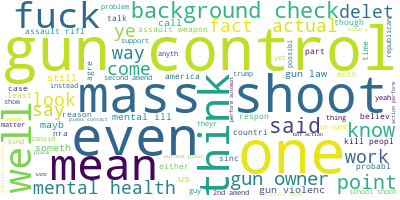

In [31]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(s['utt_text_cleaned_no_stopwords_stemmed_split'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

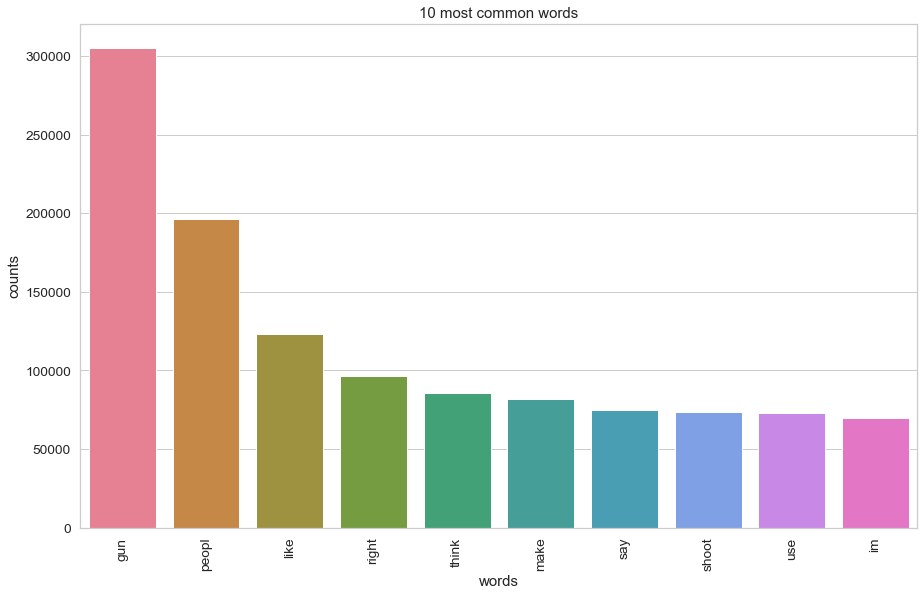

In [32]:
# Load the library with the CountVectorizer method
# this code taken from source cited at the top of this notebook
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(s['utt_text_cleaned_no_stopwords_stemmed_split'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

## 4. Run LDA Model

In [33]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 8
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
like terrorist attack muslim war american peopl terror countri say

Topic #1:
delet pleas violat comment question action concern rule automat moder

Topic #2:
remov gun rate crime httpswww reddit violenc death studi httpwww

Topic #3:
gun peopl shoot weapon use kill ban rifl mass like

Topic #4:
trump vote republican nra democrat polit parti support fuck money

Topic #5:
peopl like school im kid think know fuck say shoot

Topic #6:
gun peopl mental law check problem like make health need

Topic #7:
right peopl amend govern constitut think say arm law gun


In [34]:
# note this takes a good 2-3 hours to run

from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))

LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)

with open(LDAvis_data_filepath, 'w') as f:
    pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath) as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')

LDAvis_prepared

/Users/marianneaubin/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


TypeError: write() argument must be str, not bytes

In [35]:
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.091044  0.071691       1        1  19.911561
5      0.123410 -0.105194       2        1  19.645608
6      0.097836  0.047816       3        1  17.596197
7      0.090762 -0.032664       4        1  12.887143
0      0.071363 -0.041901       5        1  10.101334
4      0.101993 -0.125955       6        1   9.861555
2     -0.087094  0.277686       7        1   6.479480
1     -0.489316 -0.091480       8        1   3.517123, topic_info=       Category           Freq  \
86512   Default  299537.000000   
66909   Default   43389.000000   
146369  Default   95715.000000   
144530  Default   39367.000000   
135713  Default   26318.000000   
22859   Default   48552.000000   
153093  Default   71752.000000   
167566  Default   39326.000000   
45312   Default   21551.000000   
176956  Default   46618.000000   
141301  Default   25266.000000   
112131  Default   32420.000000   
16706   Default   25808.000000   
175261  Default   15413.000000   
21669   Default   18691.000000   
134032  Default   42809.000000   
21043   Default   27286.000000   
146200  Default   29839.000000   
14131   Default   20107.000000   
144938  Default   20713.000000   
175729  Default   21586.000000   
148149  Default   16312.000000   
63851   Default   26390.000000   
88756   Default   18767.000000   
95398   Default   23623.000000   
144778  Default   18103.000000   
68887   Default   17246.000000   
150159  Default   40847.000000   
104976  Default   60976.000000   
142383  Default   16598.000000   
...         ...            ...   
120607   Topic8      90.084320   
54748    Topic8      89.026069   
19199    Topic8      87.967806   
54763    Topic8     339.247290   
178425   Topic8      85.850794   
175261   Topic8   15097.551587   
159921   Topic8     615.011444   
156850   Topic8    1519.573776   
120906   Topic8    1902.326500   
135713   Topic8   23347.222855   
27768    Topic8    8533.114363   
61187    Topic8   10754.794760   
114328   Topic8    9425.023827   
62021    Topic8    2778.950971   
148149   Topic8   10586.925369   
45312    Topic8   13432.628206   
157032   Topic8    8655.032043   
34228    Topic8    8108.065322   
14131    Topic8   10757.969088   
68887    Topic8    9295.992606   
141301   Topic8   12450.286514   
21669    Topic8    9853.001253   
144778   Topic8    9391.140428   
88756    Topic8    8865.330173   
145505   Topic8    7702.657417   
82421    Topic8    7758.117968   
95398    Topic8    7924.705869   
22859    Topic8    8196.523715   
134032   Topic8    7936.347458   
21043    Topic8    7658.556144   

                                                     Term          Total  \
86512                                                 gun  299537.000000   
66909                                               delet   43389.000000   
146369                                              right   95715.000000   
144530                                              remov   39367.000000   
135713                                              pleas   26318.000000   
22859                                                 ban   48552.000000   
153093                                              shoot   71752.000000   
167566                                              trump   39326.000000   
45312                                             comment   21551.000000   
176956                                             weapon   46618.000000   
141301                                           question   25266.000000   
112131                                             mental   32420.000000   
16706                                               amend   25808.000000   
175261                                             violat   15413.000000   
21669                                             automat   18691.000000   
134032                                             person   42809.000000   
21043           